# General dataset dimentions

A quick exploratory analysis of the downloaded videos.

In [1]:
from pathlib import Path
from datetime import timedelta
from itertools import islice
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
video_src = Path('../data/general_dataset_stats.csv')
column_types = [('video_id', str), ('width', int), ('height', int), ('duration', float)]
df = pd.read_csv(video_src, index_col=0, dtype=dict(column_types))

In [3]:
pd.to_timedelta(df['duration'], 's').sum()

Timedelta('121 days 09:29:38.667000')

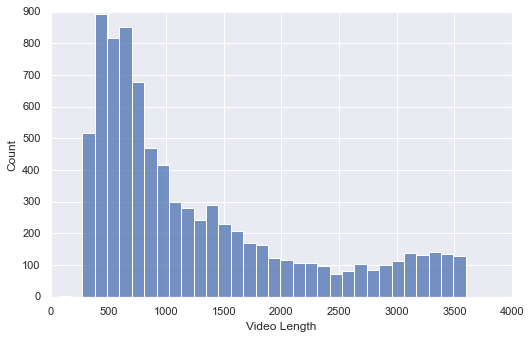

In [4]:
fig = plt.figure(figsize=(8.27, 8.27/1.618))
g = sns.histplot(df, x='duration')
g.set(xlabel='Video Length')
plt.savefig('images/video_dist_length.svg', bbox_inches='tight')
plt.savefig('images/video_dist_length.png', bbox_inches='tight')

**Figure \[video_dist_length]:** Distribution of the downloaded videos by their duration. Most videos last less than 30 minutes.

In [5]:
# Find the most frequent resolutions
df_area = df[['video_id', 'width', 'height', 'duration']]
df_area['video_id'] = 1
df_area = df_area.groupby(['width', 'height']).agg(np.sum)
df_area.reset_index(inplace=True)
df_area.rename(columns = {'video_id':'count'}, inplace=True)

df_area.sort_values('count', ascending=False, inplace=True, ignore_index=True)
df_area.head()

,width,height,count,duration
0,1280,720,3168,4024253.147
1,1920,1080,2205,3004311.219
2,640,360,662,861107.187
3,640,480,485,603316.993
4,480,360,297,282353.799


In [6]:
width, height, count, duration = df_area.values.T
idx = np.argsort(width * height)

width = width[idx].astype(int)
height = height[idx].astype(int)
count = count[idx]
duration = duration[idx]

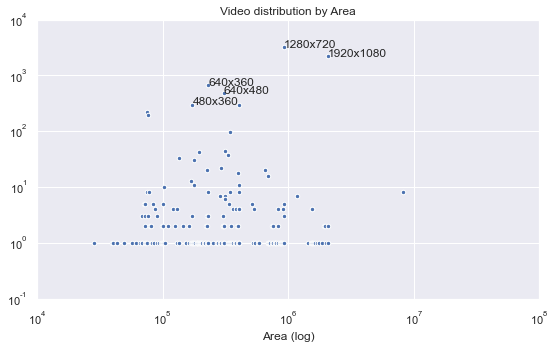

In [7]:
def plot(width, height, yvalues, title, top):
    fig = plt.figure(figsize=(9, 5))

    plt.scatter(width * height, yvalues)
    
    idx = np.argsort(yvalues)[-top:]
    width = width[idx]
    height = height[idx]
    yvalues = yvalues[idx]
    
    for w, h, c in zip(width, height, yvalues):
        plt.text(w * h, c, f"{w}x{h}")

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Area (log)')
    plt.title(title)

plot(width, height, count, 'Video distribution by Area', 5)
plt.show()

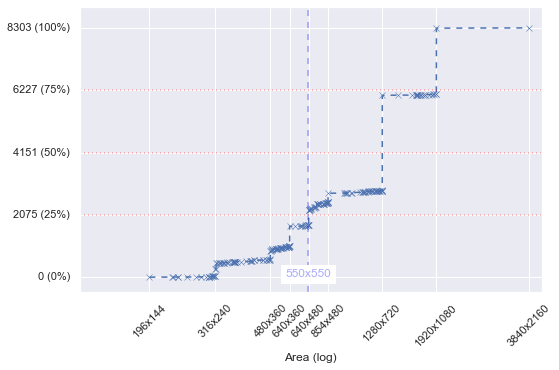

In [8]:
def plot(xvalues, count, vertical=[]):
    agg_count = np.cumsum(count)
    
    fig = plt.figure(figsize=(8.27, 8.27/1.618))
    ax = plt.axes()
    
    ax.plot(xvalues, agg_count, linestyle='--', marker='x')
    
    max_yval = agg_count.max()
    ypercent = np.float32([0, 0.25, 0.5, 0.75, 1])
    yticks = (ypercent * max_yval).astype(int)
    ylabels = [f"{v} ({p:.0%})" for v, p in zip(yticks, ypercent)]
    
    for v in yticks[1:-1]:
        ax.axhline(y=v, color='#ff000055', linestyle=':')
    
    for v in vertical:
        ax.axvline(x=v**2, color='#0000ff55', linestyle='--')
        ax.text(v**2, 0, f"{v}x{v}", ha='center', color='#0000ff55', backgroundcolor='white')
        
    # X-AXIS
    idx = np.concatenate([[0], np.argsort(count)[-7:], [-1]])
    xticks = xvalues[idx]
    xlabels = [f"{width[i]}x{height[i]}" for i in idx]
    
    ax.set_xscale('log')
    ax.set_xlabel('Area (log)')
    ax.set_xticks(xticks, xlabels, rotation=45)
    
    # Y-AXIS COUNT
    # ax.set_yscale('log')
    ax.set_yticks(yticks, ylabels)
    ax.set_ylim(bottom=-500)

plot(width * height, count, vertical=[550])
# plt.title('Video agreggate count by Area')
plt.savefig('images/video_dist_area.svg', bbox_inches='tight')
plt.savefig('images/video_dist_area.png', bbox_inches='tight')
plt.show()

**Figure \[video_dist_area]:** Aggregate count of all downloaded videos by the total area in pixels. The 25, 50 and 75 percent of total files plus the dimensions that correspond to the area value for which these boundaries are crossed are highlighted by the horizontal lines. Around 25% of the videos have a resolution smaller than 550x550.